## Las redes neuronales
Una neurona es:
Una multiplicacion entre la entrada, y los coeficientes + un bias a la que se le aplica una funcion no lineal en la salida, una de esas funcione es \sigmoid que es la utilizada en la regresion logistica.

\$a^{(L)} = \sigma(W^{(L)}.a^{(L-1)} + b^{(L)})\$

$W^{L(1)}$ es la matriz the coeficientes, quede es de tamaño nxm. Donde n es la dimension de los datos de entrada y m es la dimension de los datos de salida.

Por ejemplo en la siguiente imagen tenemos:
<img src="img/Intro_nnet.png">



\$a^{(1)} = \sigma(W^{(1)}.a^{(0)} + b^{(1)})\$

\$a^{(2)} = \sigma(W^{(2)}.a^{(1)} + b^{(2)})\$

\$a^{(3)} = \sigma(W^{(3)}.a^{(2)} + b^{(3)})\$

\$a^{(1_0)} = \sigma(W^{(0_1)}.a^{(0_0)} + W^{(1_1)}.a^{(0_1)} + W^{(2_1)}.a^{(0_2)} + b^{(2)})\$



In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## activaciones

Las activaciones permiten que las redes neuronales puedan aproximar cualquier funcion continua con 2 layers y con 3 cualquier funcion

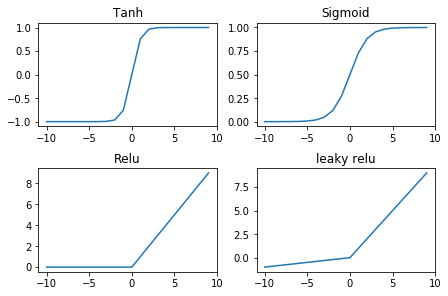

In [2]:
x =  [i for i in range(-10,10)]
fn_tanh = lambda x : ( math.exp(x) - math.exp(-x))/( math.exp(x) + math.exp(-x))
fn_sigmoid = lambda x : 1/(1+ math.exp(-x))
fn_relu = lambda x : max(0,x)
fn_leaky_relu = lambda x : max(0.1*x,x)
fig, axs =plt.subplots(nrows=2, ncols=2,constrained_layout=True)
axs[0][0].plot(x, list(map(fn_tanh,x)))
axs[0][0].set_title("Tanh")
axs[0][1].plot(x, list(map(fn_sigmoid,x)))
axs[0][1].set_title("Sigmoid")
axs[1][0].plot(x, list(map(fn_relu,x)))
axs[1][0].set_title("Relu")
axs[1][1].plot(x, list(map(fn_leaky_relu,x)))
axs[1][1].set_title("leaky relu")
plt.show()

In [3]:
import networkx as nx
from ipywidgets import interact
from bokeh.models import CustomJS, Slider
from bokeh.layouts import row, column
from bokeh.io import show, output_file, output_notebook, push_notebook
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4
output_notebook()

Loading BokehJS ...

In [4]:
def plot_network(G, g_layout=nx.spring_layout ):
    
    plot = Plot(plot_width=400, plot_height=400,
                x_range=Range1d(-1.1,1.1),
                y_range=Range1d(-1.1,1.1))
    plot.title.text = "Neural Net, "

    plot.add_tools(HoverTool(tooltips=[("index","@index"),("weight","@weight")]),
                   TapTool(), BoxSelectTool())

    graph_renderer = from_networkx(G, g_layout, scale=1, center=(0,0))
    
    graph_renderer.node_renderer.data_source.add(
                list(dict(G.nodes(data='weight')).values()), 'weight')
    graph_renderer.node_renderer.data_source.add(list(G.nodes()), 'index')

    graph_renderer.node_renderer.glyph = Circle(size=30, fill_color=Spectral4[0])
    graph_renderer.node_renderer.selection_glyph = Circle(size=30, fill_color=Spectral4[2])
    graph_renderer.node_renderer.hover_glyph = Circle(size=30, fill_color=Spectral4[1])

    graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
    graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
    graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)
    #graph_renderer.edge_renderer.
    graph_renderer.edge_renderer.data_source.add(list(G.edges()), 'index')

    graph_renderer.selection_policy = NodesAndLinkedEdges()
    #graph_renderer.inspection_policy = EdgesAndLinkedNodes()

    plot.renderers.append(graph_renderer)

    return plot
    
    

Aproximar cualquier funcion.
Si tenemos una funcion $f(x)= -x $ como la representamos con los valores de **w_0_1** y **b_1**


In [5]:
x =  1.0
w_0_1 = 0.5
b_1 = -1.0
pl = None 

G=nx.DiGraph()
G.add_node("a_0",weight=x)
G.add_node("a_1",weight=fn_sigmoid(w_0_1*x + b_1))
G.add_edge("a_0","a_1", weight=w_0_1)

pl = plot_network(G, nx.kamada_kawai_layout)
p_row = row(pl) 
bokeh_graph = show(p_row, notebook_handle=True)

In [6]:
def update(f,x, w_0_1, b_1):
    fn_act = eval(f) 
    G.add_node("a_0",weight=x)
    G.add_node("a_1",weight=fn_act(w_0_1*x + b_1))
    G.add_edge("a_0","a_1", weight=w_0_1)
    pl = plot_network(G,g_layout=nx.shell_layout)
    p_row.children=[pl]
    push_notebook(handle=bokeh_graph)

interact(update,f=["fn_sigmoid","fn_tanh","fn_relu","fn_leaky_relu"],
         x=(-1,1,0.1),w_0_1=(-10,10,0.1),b_1=(-10,10,0.1))

interactive(children=(Dropdown(description='f', options=('fn_sigmoid', 'fn_tanh', 'fn_relu', 'fn_leaky_relu'),…

<function __main__.update(f, x, w_0_1, b_1)>

Ahora practiquemos con una funcion mas compleja.

Pinta una linea para separar los siguientes datos

 0   1

 1   0


In [176]:
x =  1.0
w_0_1 = 0.5
w_0_2 = 0.5
w_1_3 = 0.5
w_2_3 = 0.5
b_1 = -1.0
b_2 = -1.0
b_3 = -1.0

pl2 = None 

G=nx.DiGraph()
G.add_node("a_0",weight=x)
G.add_node("a_1",weight=fn_sigmoid(w_0_1*G.nodes["a_0"]["weight"] + b_1))
G.add_node("a_2",weight=fn_sigmoid(w_0_2*G.nodes["a_0"]["weight"] + b_2))
G.add_node("a_3",weight=fn_sigmoid(w_2_3*G.nodes["a_2"]["weight"]+
                                   w_1_3*G.nodes["a_1"]["weight"]+ b_3))
G.add_edge("a_0","a_1",weight=w_0_1)
G.add_edge("a_0","a_2",weight=w_0_2)
G.add_edge("a_2","a_3",weight=w_2_3)
G.add_edge("a_1","a_3",weight=w_1_3)

pl2 = plot_network(G,nx.layout.fruchterman_reingold_layout(G,seed=2))
p_row2 = row(pl2) 
bokeh_graph2 = show(p_row2, notebook_handle=True)

In [113]:
def update2(f,x, w_0_1, w_0_2, w_1_3, w_2_3, b_1, b_2 ,b_3):
    fn_act = eval(f) 
    G.add_node("a_0",weight=x)
    G.add_node("a_1",weight=fn_sigmoid(w_0_1*G.nodes["a_0"]["weight"] + b_1))
    G.add_node("a_2",weight=fn_sigmoid(w_0_2*G.nodes["a_0"]["weight"] + b_2))
    G.add_node("a_3",weight=fn_sigmoid(w_2_3*G.nodes["a_2"]["weight"]+
                                       w_1_3*G.nodes["a_1"]["weight"]+ b_3))
    G.add_edge("a_0","a_1",weight=w_0_1)
    G.add_edge("a_0","a_2",weight=w_0_2)
    G.add_edge("a_2","a_3",weight=w_2_3)
    G.add_edge("a_1","a_3",weight=w_1_3)

    pl2 = plot_network(G,nx.layout.fruchterman_reingold_layout(G,seed=2))
    p_row2.children=[pl2]
    push_notebook(handle=bokeh_graph2)

interact(update2,f=["fn_sigmoid","fn_tanh","fn_relu","fn_leaky_relu"],
         x=(-1,1,0.1),w_0_1=(-10,10,0.1),w_0_2=(-10,10,0.1),
         w_1_3=(-10,10,0.1),w_2_3=(-10,10,0.1),
         b_1=(-10,10,0.1),b_2=(-10,10,0.1),b_3=(-10,10,0.1) )

interactive(children=(Dropdown(description='f', options=('fn_sigmoid', 'fn_tanh', 'fn_relu', 'fn_leaky_relu'),…

<function __main__.update2(f, x, w_0_1, w_0_2, w_1_3, w_2_3, b_1, b_2, b_3)>

### Calculando Xor con back propagation

Para crear la compuerta tenemos los siguiente:
Si x > 0.51  entonces las neuronas van a_1 tomaran el valor de 1 y a_2 el valor de 0 y Y el valor de y es 1

X|not X|Y|
--| -- | --|
0|0|0
0|1|1
1|0|1
1|1|0

Para construir esta compuerta tenemos datos.
X = 0.11 y= 1
X = 0.54 y= 1
X = 0.533 y = 0

Iniamos con los valores de w_0_1, w_0_2, w_1_3, w_2_3 = 0.5 y x=1 y los  b_1, b_2, b_3=0


\$a^{(1)} = \sigma(W^{(0,1)}.a^{(0)} + b^{(1)})\$
\$ = \sigma(0.5 \* 1. +0)= 0.378 \$

\$a^{(2)} = \sigma(W^{(0,2)}.a^{(0)} + b^{(2)})\$
\$ = \sigma(0.5 \* 1 +0)= 0.378 \$

\$a^{(3)} = \sigma(W^{(1,3)}.a^{(1)} +W^{(2,3)}.a^{(2)} + b^{(3)}) \$

\$ = \sigma(0.5 \* 0.378 + 0.5 \* 0.378 + 0) = 0.349 \$

\$ error = (0.349 - 1.0)^2 = 0.4238\$

Ahora calculemos que tanto debe cambiar $w_{0,2}$ con respecto al error.


\$ w_{0,2} = w_{0,2} - \delta \frac{\partial(error)}{\partial(w_{0,2})} \$

\$ \partial(\sigma(X)) = \partial(\frac{1}{1+e^{-X}})= f(x)(1-f(x)) \$ https://en.wikipedia.org/wiki/Logistic_function#Derivative

\$ \frac{\partial(error)}{\partial(w_{0,2})} = \frac{\partial(error)}{\partial(a^{(3)})}  \* \frac{\partial(a^{(3)})}{\partial(a^{(2)})} \*  \frac{\partial(a^{(2)})}{\partial(w_{0,2})}\$

\$ \frac{\partial(error)}{\partial(w_{0,2})} = \frac{\partial((a_3-y)^2)}{\partial(a^{(3)})}  \* \frac{\partial(\sigma(w_{1,3}\*a_1 + w_{2,3}\*a_2))}{\partial(a^{(2)})} \*  \frac{\partial(\sigma(w_{(0,2)}.X + b^{(2)}))}{\partial(w_{0,2})}\$

\$ \frac{\partial(error)}{\partial(w_{0,2})} = 2(a_3-y) \* \sigma(w_{1,3}\*a_1 + w_{2,3}\*a_2)(1-\sigma(w_{1,3}\*a_1 + w_{2,3}\*a_2)) w_{2,3}  \*  \sigma(w_{(0,2)}.X + b^{(1)})(1-\sigma(w_{(0,2)}.X + b^{(1)}))X\$

Utilizando los valores

\$  \frac{\partial(error)}{\partial(w_{0,2})} =  2 (0.349 - 1) \* 0.349(1-0.349)\* 0.5 \* 0.378 \* 0.622 * 1  = -0.03477\$


$sigmoid(W*X + b)$
= 2(sigmoid(W*X + b) - y ) * 

In [190]:
X_list = list(np.random.uniform(size=(100)))
y_list = list(map( lambda m: 1.0 if m<0.5 else 0.0, X_list))
data = list(zip(X_list, y_list))
train = data[0:80]
test = data[80:]
epochs = 100
lr =0.1
w_t = 0.5
for j in range(epochs):
    error_l = []
    for x,y in train:
        pre = fn_sigmoid(w_t*x)
        error = (pre - y)
        error_l.append(abs(error))
        w_t -= lr*(error * pre * (1-pre) * x)
    #print("Error %s" % (sum(error_l)/len(error_l)))
print(w_t,sum(error_l)/len(error_l) )

-1.5784495238714773 0.40869751492302014


In [178]:
X_list = list(np.random.uniform(size=(100)))
y_list = list(map( lambda m: 0.0 if (m >= 0.46 and m <= 0.54) else 1, X))
data = list(zip(X_list, y_list))
train = data[0:80]
test = data[80:]
epochs = 2000
lr =0.2
for j in range(epochs):
    error = []
    for x,y in train:
        G.add_node("a_0",weight=x)
        G.add_node("a_1",weight=fn_sigmoid(w_0_1*G.nodes["a_0"]["weight"] + b_1))
        G.add_node("a_2",weight=fn_sigmoid(w_0_2*G.nodes["a_0"]["weight"] + b_2))
        G.add_node("a_3",weight=fn_sigmoid(w_2_3*G.nodes["a_2"]["weight"]+
                                           w_1_3*G.nodes["a_1"]["weight"]+ b_3))
        G.add_edge("a_0","a_1",weight=w_0_1)
        G.add_edge("a_0","a_2",weight=w_0_2)
        G.add_edge("a_2","a_3",weight=w_2_3)
        G.add_edge("a_1","a_3",weight=w_1_3)
        
        w_1_3 -= lr*(2/2*(G.nodes["a_3"]["weight"]-y) *G.nodes["a_3"]["weight"]*(1-G.nodes["a_3"]["weight"])*G.nodes["a_1"]["weight"])
        w_2_3 -= lr*(2/2*(G.nodes["a_3"]["weight"]-y) *G.nodes["a_3"]["weight"]*(1-G.nodes["a_3"]["weight"])*G.nodes["a_2"]["weight"])

        w_0_2 -= lr*(2/2*(G.nodes["a_3"]["weight"]-y) \
                * G.nodes["a_3"]["weight"]*(1-G.nodes["a_3"]["weight"])*w_2_3\
                * (G.nodes["a_2"]["weight"])*(1- G.nodes["a_2"]["weight"])*x)
        w_0_1 -= lr*(2/2*(G.nodes["a_3"]["weight"]-y)\
                *G.nodes["a_3"]["weight"]*(1-G.nodes["a_3"]["weight"])*w_1_3 \
                * (G.nodes["a_1"]["weight"])*(1- G.nodes["a_1"]["weight"])*x)
        #print(abs(G.nodes["a_3"]["weight"] - y),w_1_3,w_2_3,w_0_2,w_0_1)
        error.append(abs(G.nodes["a_3"]["weight"] - y))
        
    print("Error %s" % (sum(error)/len(error)))

Error 0.21611196912220404
Error 0.21882551068745007
Error 0.22094574875103498
Error 0.22258255635482257
Error 0.2238347037697724
Error 0.22478548982064792
Error 0.2255026005332322
Error 0.2260397875101333
Error 0.22643911183800808
Error 0.22673316662562054
Error 0.22694704102400984
Error 0.2270999589801726
Error 0.22720660240984153
Error 0.22727815812818192
Error 0.22732313538989124
Error 0.22734799867872074
Error 0.22735765451240075
Error 0.2273558243298269
Error 0.2273453292363803
Error 0.22732830695416606
Error 0.22730637684641009
Error 0.22728076529142188
Error 0.22725240084673462
Error 0.2272219864338653
Error 0.22719005406476844
Error 0.2271570063165358
Error 0.22712314775413095
Error 0.22708870873219977
Error 0.22705386342126319
Error 0.2270187434580508
Error 0.22698344828122016
Error 0.22694805295674395
Error 0.22691261410233526
Error 0.22687717437249563
Error 0.22684176585377197
Error 0.22680641263495094
Error 0.22677113275263738
Error 0.22673593966398675
Error 0.2267008433614

Error 0.22002255158807543
Error 0.22000662335843524
Error 0.21999072903589215
Error 0.21997486849835451
Error 0.21995904162435043
Error 0.21994324829302353
Error 0.2199274883841275
Error 0.21991176177802477
Error 0.21989606835567974
Error 0.2198804079986573
Error 0.21986478058911713
Error 0.21984918600981115
Error 0.2198336241440794
Error 0.2198180948758448
Error 0.21980259808961175
Error 0.2197871336704605
Error 0.21977170150404463
Error 0.21975630147658642
Error 0.21974093347487403
Error 0.21972559738625724
Error 0.21971029309864482
Error 0.21969502050049963
Error 0.219679779480836
Error 0.21966456992921551
Error 0.219649391735745
Error 0.219634244791071
Error 0.21961912898637811
Error 0.21960404421338464
Error 0.21958899036433968
Error 0.21957396733201912
Error 0.21955897500972332
Error 0.21954401329127265
Error 0.21952908207100535
Error 0.21951418124377375
Error 0.21949931070494055
Error 0.21948447035037627
Error 0.21946966007645657
Error 0.219454879780058
Error 0.21944012935855498

Error 0.2161565374312706
Error 0.21614746793762896
Error 0.21613841152820346
Error 0.21612936817115586
Error 0.21612033783475743
Error 0.21611132048738835
Error 0.21610231609753755
Error 0.2160933246338018
Error 0.21608434606488497
Error 0.21607538035959842
Error 0.21606642748685972
Error 0.216057487415693
Error 0.21604856011522697
Error 0.21603964555469685
Error 0.21603074370344116
Error 0.21602185453090367
Error 0.2160129780066316
Error 0.2160041141002754
Error 0.21599526278158857
Error 0.2159864240204262
Error 0.2159775977867467
Error 0.21596878405060904
Error 0.21595998278217335
Error 0.2159511939517008
Error 0.21594241752955196
Error 0.21593365348618843
Error 0.2159249017921701
Error 0.21591616241815598
Error 0.2159074353349036
Error 0.2158987205132684
Error 0.21589001792420368
Error 0.2158813275387596
Error 0.21587264932808375
Error 0.21586398326341943
Error 0.2158553293161062
Error 0.21584668745757854
Error 0.21583805765936695
Error 0.21582943989309608
Error 0.21582083413048508


Error 0.21378047060650954
Error 0.21377440695068395
Error 0.21376834993836674
Error 0.21376229955734524
Error 0.21375625579543733
Error 0.21375021864049287
Error 0.21374418808039358
Error 0.21373816410305252
Error 0.21373214669641385
Error 0.21372613584845288
Error 0.21372013154717653
Error 0.21371413378062204
Error 0.21370814253685824
Error 0.2137021578039843
Error 0.21369617957012982
Error 0.21369020782345577
Error 0.21368424255215301
Error 0.2136782837444433
Error 0.21367233138857805
Error 0.21366638547283925
Error 0.21366044598553877
Error 0.21365451291501913
Error 0.2136485862496515
Error 0.2136426659778381
Error 0.21363675208800997
Error 0.21363084456862821
Error 0.21362494340818344
Error 0.21361904859519534
Error 0.21361316011821313
Error 0.21360727796581505
Error 0.2136014021266087
Error 0.21359553258923017
Error 0.2135896693423455
Error 0.21358381237464838
Error 0.21357796167486193
Error 0.21357211723173783
Error 0.21356627903405595
Error 0.213560447070625
Error 0.213554621330

Error 0.21211107673585183
Error 0.21210666287278018
Error 0.21210225291449664
Error 0.21209784685524183
Error 0.212093444689268
Error 0.21208904641083987
Error 0.21208465201423357
Error 0.21208026149373768
Error 0.21207587484365215
Error 0.2120714920582895
Error 0.21206711313197327
Error 0.21206273805903925
Error 0.21205836683383503
Error 0.21205399945071934
Error 0.21204963590406334
Error 0.21204527618824964
Error 0.21204092029767224
Error 0.21203656822673697
Error 0.21203221996986094
Error 0.21202787552147334
Error 0.2120235348760143
Error 0.2120191980279357
Error 0.21201486497170077
Error 0.21201053570178408
Error 0.21200621021267238
Error 0.21200188849886253
Error 0.21199757055486348
Error 0.2119932563751953
Error 0.2119889459543892
Error 0.21198463928698782
Error 0.21198033636754504
Error 0.21197603719062585
Error 0.21197174175080616
Error 0.2119674500426732
Error 0.2119631620608254
Error 0.21195887779987194
Error 0.2119545972544333
Error 0.21195032041914114
Error 0.21194604728863

Error 0.21085418475718237
Error 0.21085079262498244
Error 0.2108474030136048
Error 0.21084401591994806
Error 0.21084063134091643
Error 0.21083724927341932
Error 0.2108338697143716
Error 0.21083049266069326
Error 0.21082711810931007
Error 0.2108237460571532
Error 0.21082037650115834
Error 0.2108170094382673
Error 0.21081364486542692
Error 0.2108102827795892
Error 0.21080692317771135
Error 0.21080356605675651
Error 0.2108002114136922
Error 0.2107968592454914
Error 0.21079350954913306
Error 0.2107901623216005
Error 0.21078681755988246
Error 0.21078347526097266
Error 0.2107801354218708
Error 0.21077679803958066
Error 0.21077346311111195
Error 0.2107701306334797
Error 0.21076680060370312
Error 0.21076347301880743
Error 0.21076014787582253
Error 0.21075682517178382
Error 0.21075350490373118
Error 0.21075018706870985
Error 0.21074687166377043
Error 0.21074355868596822
Error 0.21074024813236383
Error 0.21073694000002258
Error 0.21073363428601494
Error 0.21073033098741673
Error 0.21072703010130

Error 0.20981783577021815
Error 0.20981515826652034
Error 0.20981248246916265
Error 0.20980980837635946
Error 0.2098071359863276
Error 0.209804465297286
Error 0.20980179630745704
Error 0.209799129015065
Error 0.2097964634183374
Error 0.20979379951550398
Error 0.20979113730479731
Error 0.20978847678445262
Error 0.20978581795270723
Error 0.20978316080780185
Error 0.209780505347979
Error 0.20977785157148426
Error 0.20977519947656562
Error 0.20977254906147386
Error 0.2097699003244621
Error 0.20976725326378626
Error 0.2097646078777046
Error 0.20976196416447804
Error 0.20975932212236964
Error 0.20975668174964573
Error 0.20975404304457496
Error 0.20975140600542827
Error 0.20974877063047911
Error 0.20974613691800373
Error 0.20974350486628096
Error 0.20974087447359185
Error 0.2097382457382199
Error 0.20973561865845158
Error 0.20973299323257572
Error 0.20973036945888293
Error 0.20972774733566774
Error 0.20972512686122585
Error 0.20972250803385584
Error 0.20971989085185908
Error 0.209717275313539

## Pero la vida real es dificil!!
No tenemos la funcion que intentamos predecir. Solamente contamos con datos de entrada y etiquetas. Las etiquetas nos ayudan a saber si vamos bien o mal.

Para aprender tenemos:
- Si es un problema de clasificacion: Cross entropy.
Ver notebook [arboles](https://jdramirez.github.io/UCO_ML_AI/Trees.html)

${\displaystyle H(p,q)=-\sum _{x\in {\mathcal {X}}}p(x)\,\log q(x)} =\ -y\log {\hat  {y}}-(1-y)\log(1-{\hat  {y}})$

from http://wiki.fast.ai/index.php/Log_Loss



- Si es regresion MSE.

${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.}$

In [14]:
# Taken from  https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/
def mean_squared_error(actual, predicted):
    sum_square_error = 0.0
    for i in range(len(actual)):
        sum_square_error += (actual[i] - predicted[i])**2.0
    mean_square_error = 1.0 / len(actual) * sum_square_error
    return mean_square_error

from math import log
 
# calculate binary cross entropy
def binary_cross_entropy(actual, predicted):
    sum_score = 0.0
    for i in range(len(actual)):
        sum_score += actual[i] * log(1e-15 + predicted[i])
    mean_sum_score = 1.0 / len(actual) * sum_score
    return -mean_sum_score


## Back propagation

https://google-developers.appspot.com/machine-learning/crash-course/backprop-scroll/

In [15]:
# Taken from https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/

from math import exp
from random import seed
from random import random
 
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network
 
# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation
 
# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))
 
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs
 
# Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
 
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']
 
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
 
# Test training backprop algorithm
seed(1)
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.5, 20, n_outputs)
for layer in network:
    print(layer)
    

# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))
 
# Test making predictions with the network
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]
network = [[{'weights': [-1.482313569067226, 1.8308790073202204, 1.078381922048799]}, {'weights': [0.23244990332399884, 0.3621998343835864, 0.40289821191094327]}],
    [{'weights': [2.5001872433501404, 0.7887233511355132, -1.1026649757805829]}, {'weights': [-2.429350576245497, 0.8357651039198697, 1.0699217181280656]}]]
for row in dataset:
    prediction = predict(network, row)
    print('Expected=%d, Got=%d' % (row[-1], prediction))

>epoch=0, lrate=0.500, error=6.350
>epoch=1, lrate=0.500, error=5.531
>epoch=2, lrate=0.500, error=5.221
>epoch=3, lrate=0.500, error=4.951
>epoch=4, lrate=0.500, error=4.519
>epoch=5, lrate=0.500, error=4.173
>epoch=6, lrate=0.500, error=3.835
>epoch=7, lrate=0.500, error=3.506
>epoch=8, lrate=0.500, error=3.192
>epoch=9, lrate=0.500, error=2.898
>epoch=10, lrate=0.500, error=2.626
>epoch=11, lrate=0.500, error=2.377
>epoch=12, lrate=0.500, error=2.153
>epoch=13, lrate=0.500, error=1.953
>epoch=14, lrate=0.500, error=1.774
>epoch=15, lrate=0.500, error=1.614
>epoch=16, lrate=0.500, error=1.472
>epoch=17, lrate=0.500, error=1.346
>epoch=18, lrate=0.500, error=1.233
>epoch=19, lrate=0.500, error=1.132
[{'weights': [-1.4688375095432327, 1.850887325439514, 1.0858178629550297], 'output': 0.029980305604426185, 'delta': -0.0059546604162323625}, {'weights': [0.37711098142462157, -0.0625909894552989, 0.2765123702642716], 'output': 0.9456229000211323, 'delta': 0.0026279652850863837}]
[{'weights

## Programacion Simbolica


In [136]:
import theano
import theano.tensor as T

from theano import pp
x = T.dscalar('x')
w = np.random.uniform()
y = 1/(1+ np.exp(-x*w))

gy = T.grad(y, x)
print(pp(gy))  # print out the gradient prior to optimization
f = theano.function([x], gy)
f(4)

(-((((-(fill((TensorConstant{1} / (TensorConstant{1} + exp(((-x) * TensorConstant{0.21062904250930625})))), TensorConstant{1.0}) * TensorConstant{1})) / ((TensorConstant{1} + exp(((-x) * TensorConstant{0.21062904250930625}))) * (TensorConstant{1} + exp(((-x) * TensorConstant{0.21062904250930625}))))) * exp(((-x) * TensorConstant{0.21062904250930625}))) * TensorConstant{0.21062904250930625}))


array(0.04431657)

In [17]:
#Taken from http://deeplearning.net/tutorial/logreg.html#logreg
"""
This tutorial introduces logistic regression using Theano and stochastic
gradient descent.

Logistic regression is a probabilistic, linear classifier. It is parametrized
by a weight matrix :math:`W` and a bias vector :math:`b`. Classification is
done by projecting data points onto a set of hyperplanes, the distance to
which is used to determine a class membership probability.

Mathematically, this can be written as:

.. math::
  P(Y=i|x, W,b) &= softmax_i(W x + b) \\
                &= \frac {e^{W_i x + b_i}} {\sum_j e^{W_j x + b_j}}


The output of the model or prediction is then done by taking the argmax of
the vector whose i'th element is P(Y=i|x).

.. math::

  y_{pred} = argmax_i P(Y=i|x,W,b)


This tutorial presents a stochastic gradient descent optimization method
suitable for large datasets.


References:

    - textbooks: "Pattern Recognition and Machine Learning" -
                 Christopher M. Bishop, section 4.3.2

"""

from __future__ import print_function

__docformat__ = 'restructedtext en'

import six.moves.cPickle as pickle
import gzip
import os
import sys
import timeit

import numpy

import theano
import theano.tensor as T


class LogisticRegression(object):
    """Multi-class Logistic Regression Class

    The logistic regression is fully described by a weight matrix :math:`W`
    and bias vector :math:`b`. Classification is done by projecting data
    points onto a set of hyperplanes, the distance to which is used to
    determine a class membership probability.
    """

    def __init__(self, input, n_in, n_out):
        """ Initialize the parameters of the logistic regression

        :type input: theano.tensor.TensorType
        :param input: symbolic variable that describes the input of the
                      architecture (one minibatch)

        :type n_in: int
        :param n_in: number of input units, the dimension of the space in
                     which the datapoints lie

        :type n_out: int
        :param n_out: number of output units, the dimension of the space in
                      which the labels lie

        """
        # start-snippet-1
        # initialize with 0 the weights W as a matrix of shape (n_in, n_out)
        self.W = theano.shared(
            value=numpy.zeros(
                (n_in, n_out),
                dtype=theano.config.floatX
            ),
            name='W',
            borrow=True
        )
        # initialize the biases b as a vector of n_out 0s
        self.b = theano.shared(
            value=numpy.zeros(
                (n_out,),
                dtype=theano.config.floatX
            ),
            name='b',
            borrow=True
        )

        # symbolic expression for computing the matrix of class-membership
        # probabilities
        # Where:
        # W is a matrix where column-k represent the separation hyperplane for
        # class-k
        # x is a matrix where row-j  represents input training sample-j
        # b is a vector where element-k represent the free parameter of
        # hyperplane-k
        self.p_y_given_x = T.nnet.softmax(T.dot(input, self.W) + self.b)

        # symbolic description of how to compute prediction as class whose
        # probability is maximal
        self.y_pred = T.argmax(self.p_y_given_x, axis=1)
        # end-snippet-1

        # parameters of the model
        self.params = [self.W, self.b]

        # keep track of model input
        self.input = input

    def negative_log_likelihood(self, y):
        """Return the mean of the negative log-likelihood of the prediction
        of this model under a given target distribution.

        .. math::

            \frac{1}{|\mathcal{D}|} \mathcal{L} (\theta=\{W,b\}, \mathcal{D}) =
            \frac{1}{|\mathcal{D}|} \sum_{i=0}^{|\mathcal{D}|}
                \log(P(Y=y^{(i)}|x^{(i)}, W,b)) \\
            \ell (\theta=\{W,b\}, \mathcal{D})

        :type y: theano.tensor.TensorType
        :param y: corresponds to a vector that gives for each example the
                  correct label

        Note: we use the mean instead of the sum so that
              the learning rate is less dependent on the batch size
        """
        # start-snippet-2
        # y.shape[0] is (symbolically) the number of rows in y, i.e.,
        # number of examples (call it n) in the minibatch
        # T.arange(y.shape[0]) is a symbolic vector which will contain
        # [0,1,2,... n-1] T.log(self.p_y_given_x) is a matrix of
        # Log-Probabilities (call it LP) with one row per example and
        # one column per class LP[T.arange(y.shape[0]),y] is a vector
        # v containing [LP[0,y[0]], LP[1,y[1]], LP[2,y[2]], ...,
        # LP[n-1,y[n-1]]] and T.mean(LP[T.arange(y.shape[0]),y]) is
        # the mean (across minibatch examples) of the elements in v,
        # i.e., the mean log-likelihood across the minibatch.
        return -T.mean(T.log(self.p_y_given_x)[T.arange(y.shape[0]), y])
        # end-snippet-2

    def errors(self, y):
        """Return a float representing the number of errors in the minibatch
        over the total number of examples of the minibatch ; zero one
        loss over the size of the minibatch

        :type y: theano.tensor.TensorType
        :param y: corresponds to a vector that gives for each example the
                  correct label
        """

        # check if y has same dimension of y_pred
        if y.ndim != self.y_pred.ndim:
            raise TypeError(
                'y should have the same shape as self.y_pred',
                ('y', y.type, 'y_pred', self.y_pred.type)
            )
        # check if y is of the correct datatype
        if y.dtype.startswith('int'):
            # the T.neq operator returns a vector of 0s and 1s, where 1
            # represents a mistake in prediction
            return T.mean(T.neq(self.y_pred, y))
        else:
            raise NotImplementedError()


def load_data(dataset):
    ''' Loads the dataset

    :type dataset: string
    :param dataset: the path to the dataset (here MNIST)
    '''

    #############
    # LOAD DATA #
    #############

    # Download the MNIST dataset if it is not present
    data_dir, data_file = os.path.split(dataset)
    if data_dir == "" and not os.path.isfile(dataset):
        # Check if dataset is in the data directory.
        new_path = os.path.join(
            os.path.split(__file__)[0],
            "..",
            "data",
            dataset
        )
        if os.path.isfile(new_path) or data_file == 'mnist.pkl.gz':
            dataset = new_path

    if (not os.path.isfile(dataset)) and data_file == 'mnist.pkl.gz':
        from six.moves import urllib
        origin = (
            'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        )
        print('Downloading data from %s' % origin)
        urllib.request.urlretrieve(origin, dataset)

    print('... loading data')

    # Load the dataset
    with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)
    # train_set, valid_set, test_set format: tuple(input, target)
    # input is a numpy.ndarray of 2 dimensions (a matrix)
    # where each row corresponds to an example. target is a
    # numpy.ndarray of 1 dimension (vector) that has the same length as
    # the number of rows in the input. It should give the target
    # to the example with the same index in the input.

    def shared_dataset(data_xy, borrow=True):
        """ Function that loads the dataset into shared variables

        The reason we store our dataset in shared variables is to allow
        Theano to copy it into the GPU memory (when code is run on GPU).
        Since copying data into the GPU is slow, copying a minibatch everytime
        is needed (the default behaviour if the data is not in a shared
        variable) would lead to a large decrease in performance.
        """
        data_x, data_y = data_xy
        shared_x = theano.shared(numpy.asarray(data_x,
                                               dtype=theano.config.floatX),
                                 borrow=borrow)
        shared_y = theano.shared(numpy.asarray(data_y,
                                               dtype=theano.config.floatX),
                                 borrow=borrow)
        # When storing data on the GPU it has to be stored as floats
        # therefore we will store the labels as ``floatX`` as well
        # (``shared_y`` does exactly that). But during our computations
        # we need them as ints (we use labels as index, and if they are
        # floats it doesn't make sense) therefore instead of returning
        # ``shared_y`` we will have to cast it to int. This little hack
        # lets ous get around this issue
        return shared_x, T.cast(shared_y, 'int32')

    test_set_x, test_set_y = shared_dataset(test_set)
    valid_set_x, valid_set_y = shared_dataset(valid_set)
    train_set_x, train_set_y = shared_dataset(train_set)

    rval = [(train_set_x, train_set_y), (valid_set_x, valid_set_y),
            (test_set_x, test_set_y)]
    return rval


def sgd_optimization_mnist(learning_rate=0.13, n_epochs=1000,
                           dataset='data/mnist.pkl.gz',
                           batch_size=600):
    """
    Demonstrate stochastic gradient descent optimization of a log-linear
    model

    This is demonstrated on MNIST.

    :type learning_rate: float
    :param learning_rate: learning rate used (factor for the stochastic
                          gradient)

    :type n_epochs: int
    :param n_epochs: maximal number of epochs to run the optimizer

    :type dataset: string
    :param dataset: the path of the MNIST dataset file from
                 http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz

    """
    datasets = load_data(dataset)

    train_set_x, train_set_y = datasets[0]
    valid_set_x, valid_set_y = datasets[1]
    test_set_x, test_set_y = datasets[2]

    # compute number of minibatches for training, validation and testing
    n_train_batches = train_set_x.get_value(borrow=True).shape[0] // batch_size
    n_valid_batches = valid_set_x.get_value(borrow=True).shape[0] // batch_size
    n_test_batches = test_set_x.get_value(borrow=True).shape[0] // batch_size

    ######################
    # BUILD ACTUAL MODEL #
    ######################
    print('... building the model')

    # allocate symbolic variables for the data
    index = T.lscalar()  # index to a [mini]batch

    # generate symbolic variables for input (x and y represent a
    # minibatch)
    x = T.matrix('x')  # data, presented as rasterized images
    y = T.ivector('y')  # labels, presented as 1D vector of [int] labels

    # construct the logistic regression class
    # Each MNIST image has size 28*28
    classifier = LogisticRegression(input=x, n_in=28 * 28, n_out=10)

    # the cost we minimize during training is the negative log likelihood of
    # the model in symbolic format
    cost = classifier.negative_log_likelihood(y)

    # compiling a Theano function that computes the mistakes that are made by
    # the model on a minibatch
    test_model = theano.function(
        inputs=[index],
        outputs=classifier.errors(y),
        givens={
            x: test_set_x[index * batch_size: (index + 1) * batch_size],
            y: test_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )

    validate_model = theano.function(
        inputs=[index],
        outputs=classifier.errors(y),
        givens={
            x: valid_set_x[index * batch_size: (index + 1) * batch_size],
            y: valid_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )

    # compute the gradient of cost with respect to theta = (W,b)
    g_W = T.grad(cost=cost, wrt=classifier.W)
    g_b = T.grad(cost=cost, wrt=classifier.b)

    # start-snippet-3
    # specify how to update the parameters of the model as a list of
    # (variable, update expression) pairs.
    updates = [(classifier.W, classifier.W - learning_rate * g_W),
               (classifier.b, classifier.b - learning_rate * g_b)]

    # compiling a Theano function `train_model` that returns the cost, but in
    # the same time updates the parameter of the model based on the rules
    # defined in `updates`
    train_model = theano.function(
        inputs=[index],
        outputs=cost,
        updates=updates,
        givens={
            x: train_set_x[index * batch_size: (index + 1) * batch_size],
            y: train_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )
    # end-snippet-3

    ###############
    # TRAIN MODEL #
    ###############
    print('... training the model')
    # early-stopping parameters
    patience = 5000  # look as this many examples regardless
    patience_increase = 2  # wait this much longer when a new best is
                                  # found
    improvement_threshold = 0.995  # a relative improvement of this much is
                                  # considered significant
    validation_frequency = min(n_train_batches, patience // 2)
                                  # go through this many
                                  # minibatche before checking the network
                                  # on the validation set; in this case we
                                  # check every epoch

    best_validation_loss = numpy.inf
    test_score = 0.
    start_time = timeit.default_timer()

    done_looping = False
    epoch = 0
    while (epoch < n_epochs) and (not done_looping):
        epoch = epoch + 1
        for minibatch_index in range(n_train_batches):

            minibatch_avg_cost = train_model(minibatch_index)
            # iteration number
            iter = (epoch - 1) * n_train_batches + minibatch_index

            if (iter + 1) % validation_frequency == 0:
                # compute zero-one loss on validation set
                validation_losses = [validate_model(i)
                                     for i in range(n_valid_batches)]
                this_validation_loss = numpy.mean(validation_losses)

                print(
                    'epoch %i, minibatch %i/%i, validation error %f %%' %
                    (
                        epoch,
                        minibatch_index + 1,
                        n_train_batches,
                        this_validation_loss * 100.
                    )
                )

                # if we got the best validation score until now
                if this_validation_loss < best_validation_loss:
                    #improve patience if loss improvement is good enough
                    if this_validation_loss < best_validation_loss *  \
                       improvement_threshold:
                        patience = max(patience, iter * patience_increase)

                    best_validation_loss = this_validation_loss
                    # test it on the test set

                    test_losses = [test_model(i)
                                   for i in range(n_test_batches)]
                    test_score = numpy.mean(test_losses)

                    print(
                        (
                            '     epoch %i, minibatch %i/%i, test error of'
                            ' best model %f %%'
                        ) %
                        (
                            epoch,
                            minibatch_index + 1,
                            n_train_batches,
                            test_score * 100.
                        )
                    )

                    # save the best model
                    with open('best_model.pkl', 'wb') as f:
                        pickle.dump(classifier, f)

            if patience <= iter:
                done_looping = True
                break

    end_time = timeit.default_timer()
    print(
        (
            'Optimization complete with best validation score of %f %%,'
            'with test performance %f %%'
        )
        % (best_validation_loss * 100., test_score * 100.)
    )
    print('The code run for %d epochs, with %f epochs/sec' % (
        epoch, 1. * epoch / (end_time - start_time)))
    print(('The code for file ' +
           os.path.split(__file__)[1] +
           ' ran for %.1fs' % ((end_time - start_time))), file=sys.stderr)


def predict():
    """
    An example of how to load a trained model and use it
    to predict labels.
    """

    # load the saved model
    classifier = pickle.load(open('best_model.pkl'))

    # compile a predictor function
    predict_model = theano.function(
        inputs=[classifier.input],
        outputs=classifier.y_pred)

    # We can test it on some examples from test test
    dataset='mnist.pkl.gz'
    datasets = load_data(dataset)
    test_set_x, test_set_y = datasets[2]
    test_set_x = test_set_x.get_value()

    predicted_values = predict_model(test_set_x[:10])
    print("Predicted values for the first 10 examples in test set:")
    print(predicted_values)


if __name__ == '__main__':
    sgd_optimization_mnist()

... loading data
... building the model
... training the model
epoch 1, minibatch 83/83, validation error 12.458333 %
     epoch 1, minibatch 83/83, test error of best model 12.375000 %
epoch 2, minibatch 83/83, validation error 11.010417 %
     epoch 2, minibatch 83/83, test error of best model 10.958333 %
epoch 3, minibatch 83/83, validation error 10.312500 %
     epoch 3, minibatch 83/83, test error of best model 10.312500 %
epoch 4, minibatch 83/83, validation error 9.875000 %
     epoch 4, minibatch 83/83, test error of best model 9.833333 %
epoch 5, minibatch 83/83, validation error 9.562500 %
     epoch 5, minibatch 83/83, test error of best model 9.479167 %
epoch 6, minibatch 83/83, validation error 9.322917 %
     epoch 6, minibatch 83/83, test error of best model 9.291667 %
epoch 7, minibatch 83/83, validation error 9.187500 %
     epoch 7, minibatch 83/83, test error of best model 9.000000 %
epoch 8, minibatch 83/83, validation error 8.989583 %
     epoch 8, minibatch 83/83,

NameError: name '__file__' is not defined